In [2]:
from urllib.request import urlopen
import json
import pandas as pd
import plotly.express as px
from eurostatapiclient import EurostatAPIClient
from nuts2 import codes_el

client = EurostatAPIClient('v2.1', 'json', 'en')

params = {'sex': 'T', 'geo': codes_el.keys(), 'age': 'Y15-74',
          'isced11': 'TOTAL'} 
df = client.get_dataset('lfst_r_lfu3rt/', params).to_dataframe()
df.dropna(inplace = True)
df['region_name'] = df['geo'].apply(lambda x: codes_el[x])
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df.set_index('time', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 1999-01-01 to 2020-01-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   values       286 non-null    float64
 1   isced11      286 non-null    object 
 2   sex          286 non-null    object 
 3   age          286 non-null    object 
 4   unit         286 non-null    object 
 5   geo          286 non-null    object 
 6   region_name  286 non-null    object 
 7   year         286 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 20.1+ KB


In [34]:
nuts2_polygons = 'https://raw.githubusercontent.com/eurostat/Nuts2json/master/2021/4326/10M/nutsrg_2.json'
with urlopen(nuts2_polygons) as response:
    regions = json.load(response)

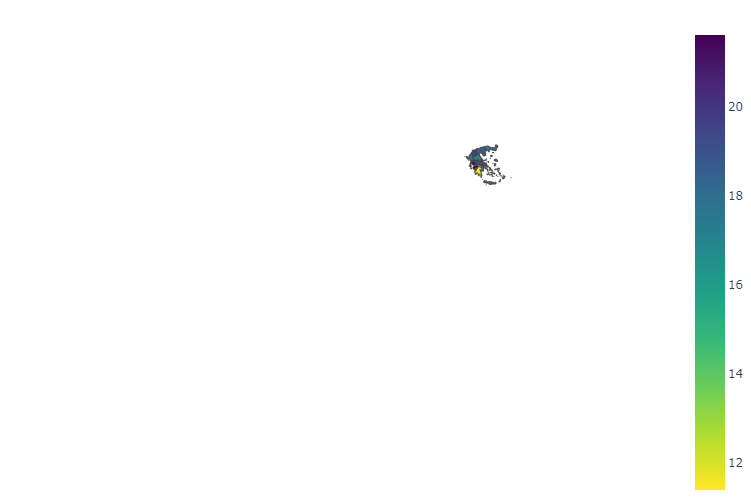

In [66]:
latest = str(df.index.year[-1])

hover_data = {'geo': False, 'values': False,
              'text': True}

hovertemplate = '%{customdata[0]}<br>%{customdata[1]:.2f}'

fig = px.choropleth(df.loc[latest], geojson = regions,
                    locations = 'geo', color = 'values',
                    featureidkey = 'properties.id',
                    color_continuous_scale="Viridis_r",
                    projection = 'mercator',
                    fitbounds = 'locations',
                  #  animation_frame = 'year',
                    basemap_visible = False,
                    width = 700, height = 500,
                    custom_data = ['region_name', 'values'],
                    title = '')

fig.update_traces(hovertemplate=hovertemplate)
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0})
fig.update_coloraxes(colorbar_title_text="")
fig.show()

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths.csv')
df['date'] = pd.to_datetime(df['date'])
cols = ['date', 'Greece']
df = df[cols]
df.rename(columns = {'date': 'time', 'Greece': 'values'}, inplace = True)
df.dropna(inplace = True)


In [10]:
df

time  values
49  2020-03-11     1.0
50  2020-03-12     0.0
51  2020-03-13     0.0
52  2020-03-14     2.0
53  2020-03-15     1.0
..         ...     ...
650 2021-11-02    60.0
651 2021-11-03    59.0
652 2021-11-04    42.0
653 2021-11-05    49.0
654 2021-11-06    43.0

[606 rows x 2 columns]

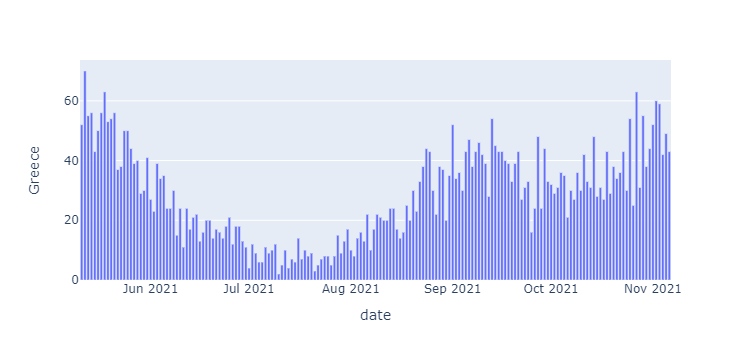

In [8]:
fig = px.bar(df[-180:], x = 'date', y = 'Greece')
fig.show()

In [13]:
!pip show streamlit plotly pandas eurostatapiclient

Name: streamlit
Version: 1.0.0
Summary: The fastest way to build data apps in Python
Home-page: https://streamlit.io
Author: Streamlit Inc
Author-email: hello@streamlit.io
License: Apache 2
Location: c:\users\derevirn\miniconda3\envs\pycaret\lib\site-packages
Requires: pyarrow, base58, toml, cachetools, requests, blinker, numpy, attrs, watchdog, pydeck, python-dateutil, altair, pillow, validators, astor, click, packaging, tornado, gitpython, protobuf, pandas, tzlocal
Required-by: 
---
Name: plotly
Version: 5.3.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: c:\users\derevirn\miniconda3\envs\pycaret\lib\site-packages
Requires: six, tenacity
Required-by: pycaret, dash, cufflinks, catboost
---
Name: pandas
Version: 1.3.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas D

In [12]:
json

<module 'json' from 'c:\\users\\derevirn\\miniconda3\\envs\\pycaret\\lib\\json\\__init__.py'>